# TASK - 4

# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['ID', 'Entity', 'sentiment', 'comment']
df = pd.read_csv("C:\\Users\\Ash\\Downloads\\Compressed\\archive\\twitter_training.csv", header= 0 , names = column_names)

In [3]:
df.head()

,ID,Entity,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.tail()

,ID,Entity,sentiment,comment
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
df.shape

(74681, 4)

In [6]:
#Count of unique entities
entity_count = df['Entity'].value_counts()
print(entity_count)

Entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [7]:
df.info

<bound method DataFrame.info of          ID       Entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                 comment  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window

In [8]:
# checking duplicates
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows.count()

ID           2700
Entity       2700
sentiment    2700
comment      2340
dtype: int64

In [9]:
#dropping duplicates
df.drop_duplicates(inplace = True)

In [10]:
#checking for missing values
df.isnull().sum()

ID             0
Entity         0
sentiment      0
comment      326
dtype: int64

In [11]:
#dropping missing values
df = df.dropna()

In [12]:
df.isnull().sum()

ID           0
Entity       0
sentiment    0
comment      0
dtype: int64

In [13]:
df.nunique()

ID           12447
Entity          32
sentiment        4
comment      69490
dtype: int64

In [14]:
#To display samples
for i in range(5):
    print(f"{i+1}: {df['comment'][i]}  -> {df['sentiment'][i]}")

1: I am coming to the borders and I will kill you all,  -> Positive
2: im getting on borderlands and i will kill you all,  -> Positive
3: im coming on borderlands and i will murder you all,  -> Positive
4: im getting on borderlands 2 and i will murder you me all,  -> Positive
5: im getting into borderlands and i can murder you all,  -> Positive


In [15]:
#sentiment analysis
df['sentiment'].value_counts()

sentiment
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

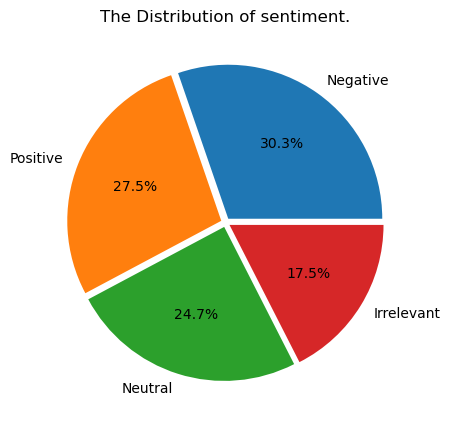

In [16]:
plt.figure(figsize = (10,5))
plt.pie(x=df['sentiment'].value_counts().values, labels = df['sentiment'].value_counts().index, autopct ='%.1f%%', 
        explode = [0.03, 0.03, 0.03, 0.03])
plt.title('The Distribution of sentiment.')
plt.show()

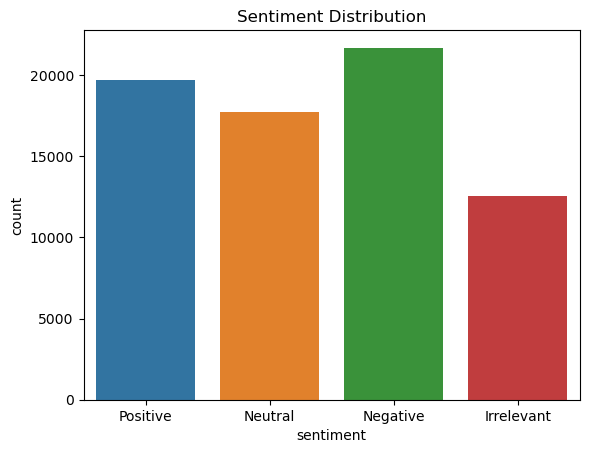

In [17]:
sns.countplot(x='sentiment', data = df)
plt.title('Sentiment Distribution')
plt.show()

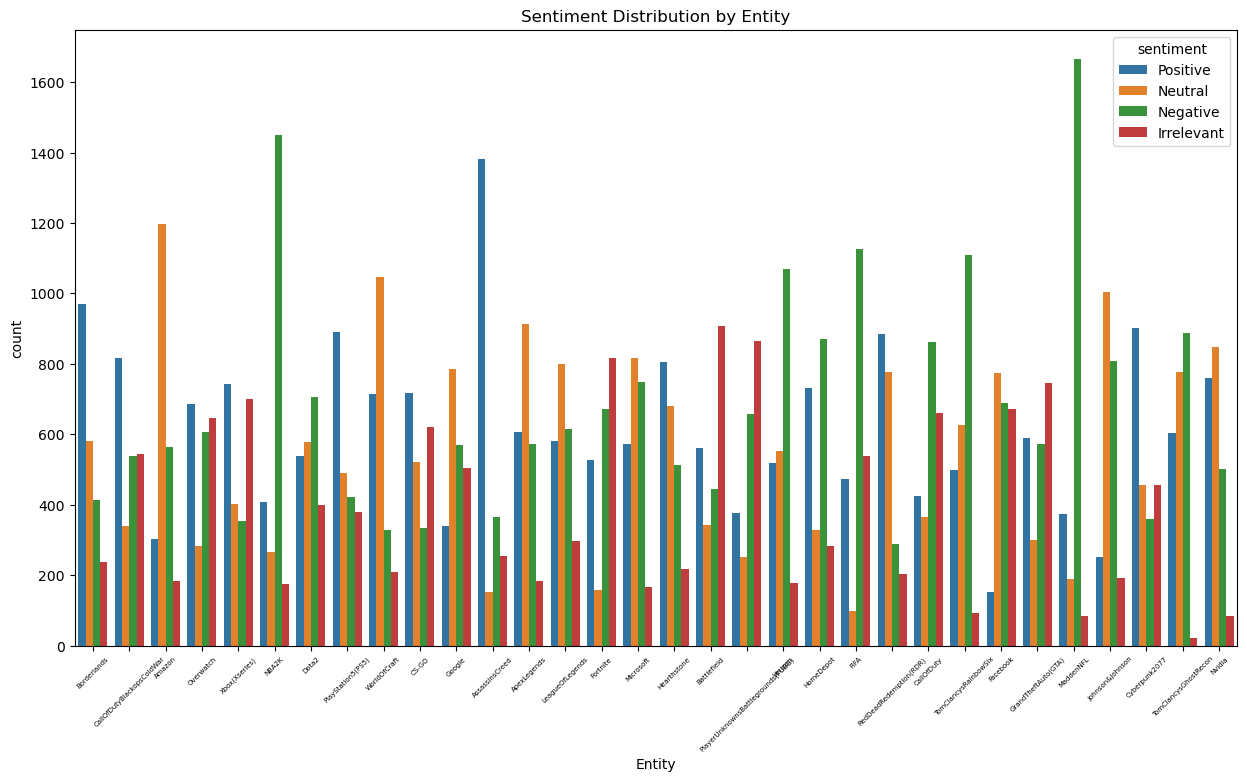

In [18]:
#sentiment distribution by entity
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Entity', hue = 'sentiment', data = df)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation = 45, fontsize=5)
plt.show()

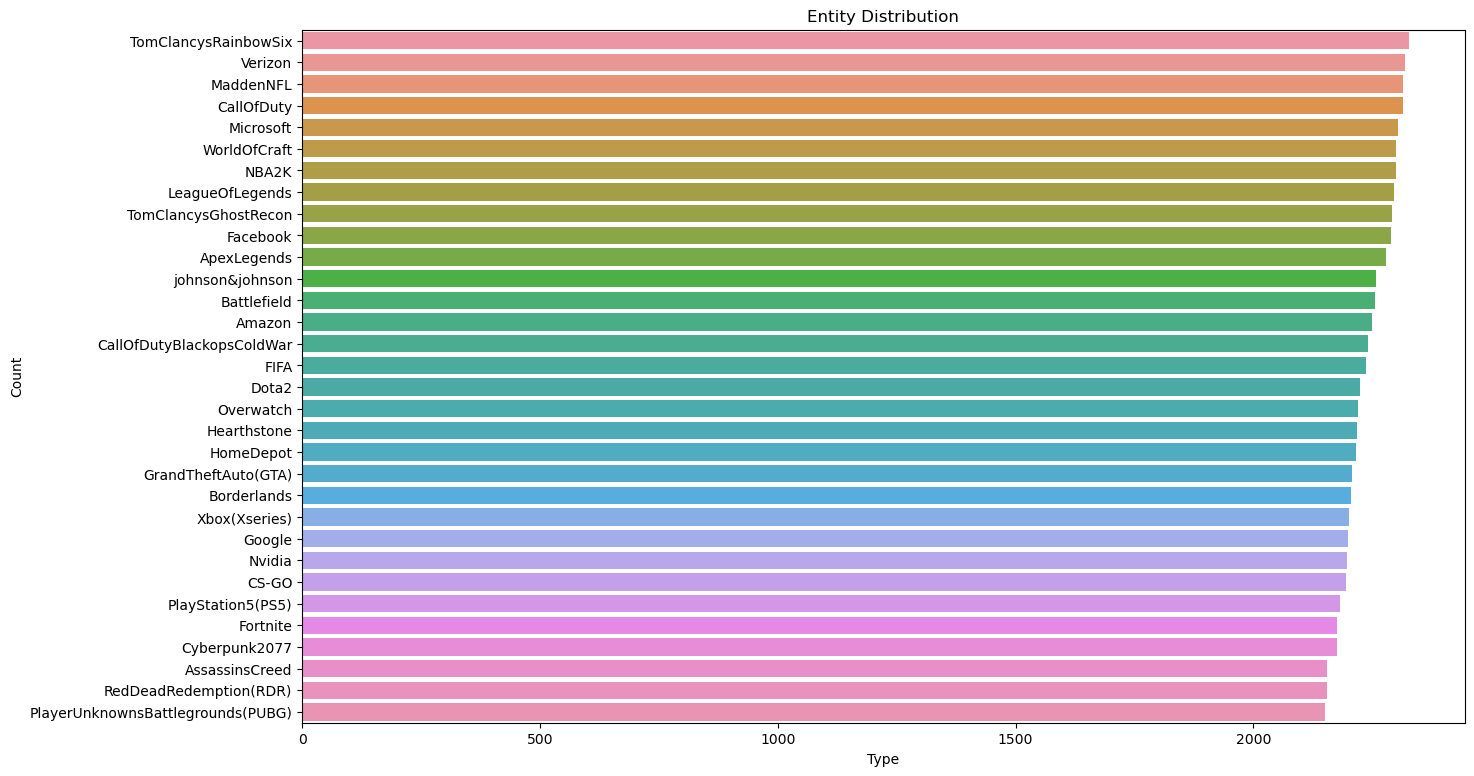

In [19]:
plt.figure(figsize = (15,9))
sns.barplot(x=df['Entity'].value_counts().values, y = df['Entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

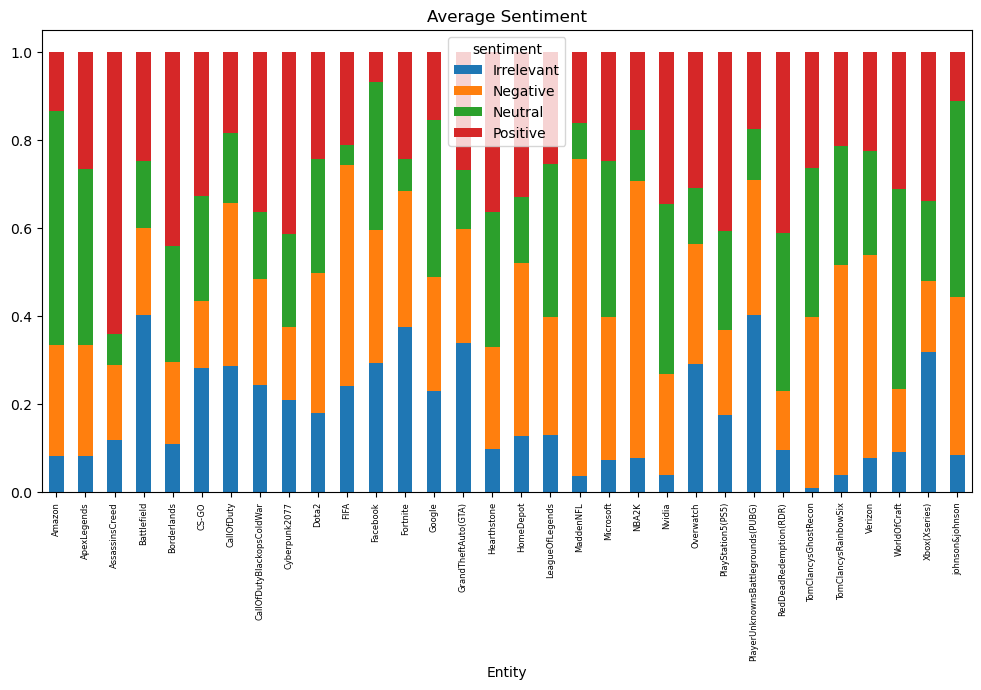

In [20]:
average_sentiment_entity = df.groupby('Entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_entity.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.title('Average Sentiment')
plt.xticks(fontsize=6)
plt.show()

In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['compound'] = df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Ash\AppData\Local\Temp\ipykernel_2848\2477113831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])


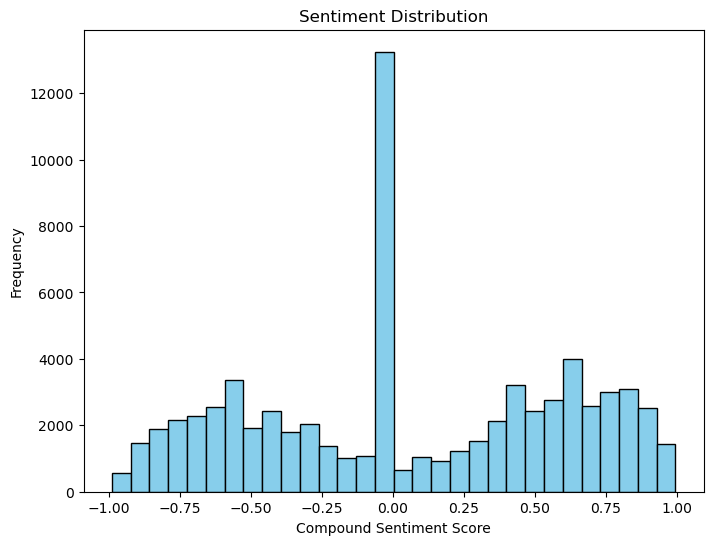

In [23]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df['compound'].plot(kind='hist', bins=30, edgecolor='black', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Create word clouds for positive and negative sentiments
positive_text = ' '.join(df[df['compound'] > 0]['comment'])
negative_text = ' '.join(df[df['compound'] < 0]['comment'])

(-0.5, 799.5, 399.5, -0.5)

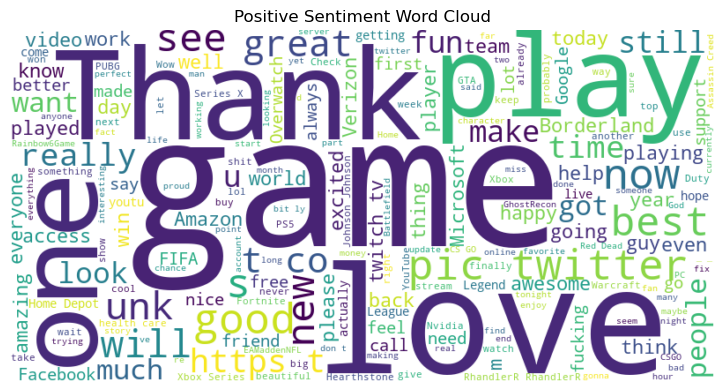

In [25]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

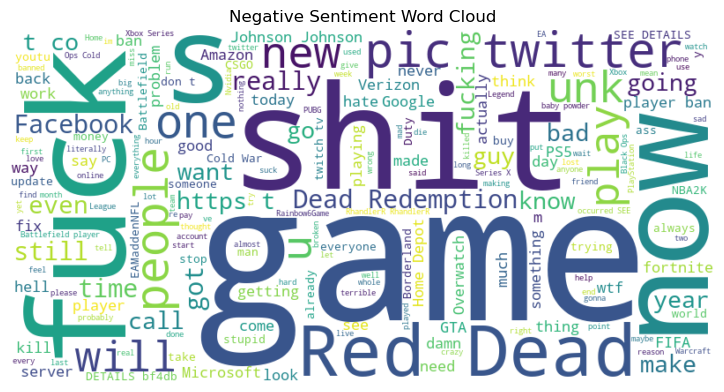

In [28]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()